In [8]:
from collections import defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Number of phased SVs

In [2]:
ncell = 350
dat = pd.read_csv("results/quant_phased_svs.HG001_Cell_%d.tsv" % ncell, sep="\t")
dat = dat[dat["GenoType"] != "."]
d1 = dat[["DEL" in x for x in dat["Name_HP1"]]]
d2 = dat[["INS" in x for x in dat["Name_HP1"]]]
len(d1), len(d2)

(5184, 4667)

[1862 3322 1979 2688]


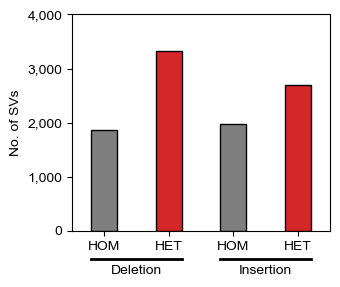

In [5]:
c1 = len(d1[d1["GenoType"] == "1|1"])
c2 = len(d1) - c1
c3 = len(d2[d2["GenoType"] == "1|1"])
c4 = len(d2) - c3
xs = np.arange(4)
ys = np.array([c1, c2, c3, c4])
print(ys)
ylim = 4000
w = 0.4
plt.figure(figsize=(3.5, 3))
plt.bar(xs, ys, width=w, edgecolor="black", color=["C7", "C3", "C7", "C3"])
plt.text(0.5, ylim * -0.2, "Deletion", ha="center")
plt.text(2.5, ylim * -0.2, "Insertion", ha="center")
plt.plot([0 - w / 2, 1 + w / 2], [ylim * -0.13, ylim * -0.13], lw=2, color="black", clip_on=False)
plt.plot([2 - w / 2, 3 + w / 2], [ylim * -0.13, ylim * -0.13], lw=2, color="black", clip_on=False)
plt.xlim(-0.5, 3.5)
plt.xticks(xs, ["HOM", "HET", "HOM", "HET"])
plt.ylim(0, ylim)
vs = np.arange(0, ylim + 1, 1000)
plt.yticks(vs, [format(v, ",") for v in vs])
plt.ylabel("No. of SVs")
plt.tight_layout()
plt.savefig("figures/number_of_phased_svs.350cells.pdf", dpi=300)

# Number of phased SVs (downsample)

In [6]:
ncells = [50, 75, 100, 125, 150, 200, 250, 300, 350]
dats = []
for ncell in ncells:
    dat = pd.read_csv("results/quant_phased_svs.HG001_Cell_%d.tsv" % ncell, sep="\t")
    dats.append(dat)

In [9]:
counters = []
for ncell, dat in zip(ncells, dats):
    counter = defaultdict(int)
    for name, gt in dat[["Name_HP1", "GenoType"]].values:
        if gt == ".":
            continue
        svtype = name.split(".")[1]
        if gt == "1|1":
            s = "HOM"
        else:
            s = "HET"
        counter[(svtype, s)] += 1
    counters.append(counter)
for ncell, counter in zip(ncells, counters):
    print(ncell, sorted(counter.items()), sep="\t")

50	[(('DEL', 'HET'), 188), (('DEL', 'HOM'), 68), (('INS', 'HET'), 66), (('INS', 'HOM'), 46)]
75	[(('DEL', 'HET'), 678), (('DEL', 'HOM'), 319), (('INS', 'HET'), 299), (('INS', 'HOM'), 187)]
100	[(('DEL', 'HET'), 1272), (('DEL', 'HOM'), 623), (('INS', 'HET'), 601), (('INS', 'HOM'), 425)]
125	[(('DEL', 'HET'), 1846), (('DEL', 'HOM'), 907), (('INS', 'HET'), 999), (('INS', 'HOM'), 683)]
150	[(('DEL', 'HET'), 2249), (('DEL', 'HOM'), 1162), (('INS', 'HET'), 1341), (('INS', 'HOM'), 899)]
200	[(('DEL', 'HET'), 2740), (('DEL', 'HOM'), 1476), (('INS', 'HET'), 1863), (('INS', 'HOM'), 1308)]
250	[(('DEL', 'HET'), 3066), (('DEL', 'HOM'), 1694), (('INS', 'HET'), 2317), (('INS', 'HOM'), 1623)]
300	[(('DEL', 'HET'), 3220), (('DEL', 'HOM'), 1792), (('INS', 'HET'), 2543), (('INS', 'HOM'), 1823)]
350	[(('DEL', 'HET'), 3322), (('DEL', 'HOM'), 1862), (('INS', 'HET'), 2688), (('INS', 'HOM'), 1979)]


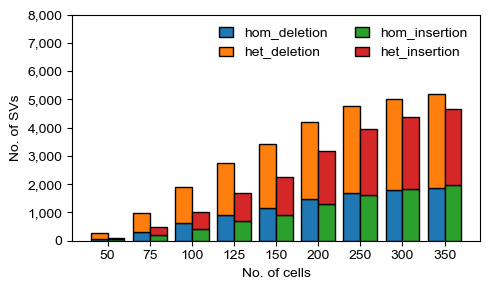

In [10]:
xs = np.arange(len(ncells))
xs1 = xs - w / 2
xs2 = xs + w / 2
ys1 = [counter[("DEL", "HOM")] for counter in counters]
ys2 = [counter[("DEL", "HET")] for counter in counters]
ys3 = [counter[("INS", "HOM")] for counter in counters]
ys4 = [counter[("INS", "HET")] for counter in counters]
w = 0.4
plt.figure(figsize=(5, 3))
plt.bar(xs1, ys1, width=w, edgecolor="black", label="hom_deletion")
plt.bar(xs1, ys2, bottom=ys1, width=w, edgecolor="black", label="het_deletion")
plt.bar(xs2, ys3, width=w, edgecolor="black", label="hom_insertion")
plt.bar(xs2, ys4, bottom=ys3, width=w, edgecolor="black", label="het_insertion")
plt.xticks(xs, map(str, ncells))
plt.xlabel("No. of cells")
plt.ylabel("No. of SVs")
ys = np.arange(0, 8000 + 1, 1000)
plt.yticks(ys, [format(y, ",") for y in ys])
plt.legend(ncol=2, handlelength=1, frameon=False)
plt.tight_layout()
plt.savefig("figures/number_of_phased_svs.pdf", dpi=300)